In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.io.votable import parse_single_table
from astropy.table import Table
from astropy.io import ascii

In [ ]:
random_sources = './external/XpSampledMeanSpectrum_003112-005263.csv'

In [ ]:
temp = ascii.read(random_sources, guess=False, delimiter=',').to_pandas()
temp

,source_id,solution_id,ra,dec,flux,flux_error
0,27373823737813120,4545469030156206081,43.925368,10.545138,"[1.4238501E-16,1.3138286E-16,1.2891419E-16,1.2...","[2.2848512E-17,1.6886805E-17,1.3896489E-17,1.2..."
1,27373823737813376,4545469030156206080,43.917838,10.546805,"[5.0583084E-17,5.220117E-17,3.6560953E-17,3.10...","[1.0846855E-17,8.075001E-18,6.6375243E-18,5.82..."
2,27376366358445696,4545469030156206081,44.114780,10.653418,"[5.6101374E-17,5.4696488E-17,5.2999695E-17,5.0...","[8.971559E-18,6.493577E-18,5.1455428E-18,4.312..."
3,27377976970918912,4545469030156206080,43.872819,10.604958,"[9.444985E-17,9.6611374E-17,8.816123E-17,7.829...","[3.833282E-17,2.781391E-17,2.3202214E-17,1.999..."
4,27378049985631360,4545469030156206081,43.877723,10.616233,"[4.5930266E-17,3.3169387E-17,3.3330465E-17,3.7...","[9.230113E-18,6.65004E-18,5.462669E-18,4.71095..."
...,...,...,...,...,...,...
22053,46297243487580288,4545469030156206081,60.521736,16.793724,"[9.937592E-17,8.268048E-17,7.8873624E-17,7.819...","[2.3343943E-17,1.9476336E-17,1.4384476E-17,1.3..."
22054,46297690163773440,4545469030156206080,60.552377,16.809614,"[5.719235E-17,5.3227458E-17,4.7014213E-17,4.16...","[8.277778E-18,6.124786E-18,4.968865E-18,4.2158..."
22055,46299064553273600,4545469030156206080,60.399676,16.793593,"[2.5005845E-17,1.3638129E-17,9.040504E-18,1.05...","[8.170095E-18,6.1785143E-18,4.9518717E-18,4.40..."
22056,46301126137608192,4545469030156206081,60.538519,16.874781,"[1.7408699E-16,1.504176E-16,1.59273E-16,1.6169...","[8.550014E-17,6.823445E-17,5.9123065E-17,5.502..."


In [5]:
rvs_dir = './spectra/RVS'
xp_dir = './spectra/XP'
labels_file = './queries/labels.csv'
labels_df = pd.read_csv(labels_file)
df = parse_single_table('./queries/DR3 sources-result.vot').to_table().to_pandas()
df_dr2 = parse_single_table('./queries/DR2_DR3_sources-result.vot').to_table().to_pandas()

In [6]:
df.shape

(15664, 16)

In [7]:
df.sort_values('ang_sep', ascending=True, inplace=True)
df.drop_duplicates('source_id', keep='first', inplace=True)
df.shape

(15661, 16)

In [8]:
df.columns

Index(['source_id', 'source_id_2', 'ra', 'dec', 'parallax',
       'parallax_over_error', 'ruwe', 'has_xp_sampled', 'has_rvs',
       'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'classprob_dsc_combmod_star', 'classprob_dsc_specmod_star',
       'spectraltype_esphs', 'ang_sep'],
      dtype='object')

In [9]:
df.drop(['source_id', 'ang_sep'], axis = 1, inplace = True)
df.rename(columns={'source_id_2': 'source_id'}, inplace=True)
df.shape

(15661, 14)

In [10]:
df.drop(df[df['ruwe']>1.4].index, inplace=True)
df.shape

(14420, 14)

In [11]:
df.drop(df[df['parallax'].isnull()].index, inplace=True)
df.shape

(14415, 14)

In [12]:
df.drop(df[df['parallax_over_error']<3].index, inplace=True)
df.shape

(14390, 14)

In [13]:
df.drop(['ra','dec','parallax','parallax_over_error','ruwe','classprob_dsc_combmod_star','classprob_dsc_specmod_star'], axis = 1, inplace = True)
df.shape

(14390, 7)

In [14]:
df

,source_id,has_xp_sampled,has_rvs,teff_gspphot,logg_gspphot,mh_gspphot,spectraltype_esphs
11289,3327843946315581952,False,False,NaN,NaN,NaN,B
2893,466475508969557888,True,False,18411.494141,3.5385,-0.3139,B
11246,3325513363920961408,True,False,16151.836914,3.7164,0.0395,B
3453,3375508943611375488,True,False,18823.841797,3.4316,0.2918,B
1954,4063973032805550592,True,False,15295.044922,3.4026,0.0999,G
...,...,...,...,...,...,...,...
14293,5940492348053213824,True,False,NaN,NaN,NaN,K
3007,244931509471430784,True,False,6397.112793,4.0006,-1.7602,F
6519,458558784733311232,True,False,NaN,NaN,NaN,B
7257,5781114426684039168,True,False,NaN,NaN,NaN,M


## Merging data with labels

Our first step is to merge the data and the labels.

The paper 

## Combine data files and labels into a single dataset 

In [15]:
labels_df = pd.read_csv(labels_file)
labels_df

,Cat,ID_ALS,ID_DR2
0,M,1,3400904642850801792
1,M,2,3398880716823578368
2,M,3,3398822751945120128
3,M,4,3350097928520768640
4,M,5,3398557735283620224
...,...,...,...
15657,I,20143,4146600472558819200
15658,I,20145,4146598818993604480
15659,I,20147,4146600399547025280
15660,M,20151,5940106793062992128


According to the paper

* M - Likely massive star
* I - High/intermediate mass star
* L - Low mass star
* E - Extragalactic star
* H - High gravity star

In [16]:
labels_df['Cat'].unique()

array(['M', 'H', 'I', 'L', 'E'], dtype=object)

In [17]:
labels_df.drop('ID_ALS', axis=1, inplace=True)
labels_df.rename(columns={'ID_DR2': 'source_id'}, inplace=True)

In [18]:
df_dr2.rename(columns={'dr2_source_id': 'source_id'}, inplace=True)
df_dr2.drop_duplicates('source_id', keep='first', inplace=True)

In [19]:
labels_df = labels_df.merge(df_dr2, on='source_id', how='left')

In [20]:
labels_df

,Cat,source_id,dr3_source_id
0,M,3400904642850801792,3400904642850801792
1,M,3398880716823578368,3398880716823578368
2,M,3398822751945120128,3398822751945120128
3,M,3350097928520768640,3350097928520768640
4,M,3398557735283620224,3398557735283620224
...,...,...,...
15657,I,4146600472558819200,4146600472556852864
15658,I,4146598818993604480,4146598818993604480
15659,I,4146600399547025280,4146600399547025280
15660,M,5940106793062992128,5940106793062992128


In [21]:
labels_df.drop('source_id', axis=1, inplace=True)
labels_df.rename(columns={'dr3_source_id': 'source_id'}, inplace=True)

In [22]:
df = df.merge(labels_df, on='source_id', how='left')

In [23]:
df['Cat'].value_counts()

Cat
M    12508
I     1320
L      224
H      109
Name: count, dtype: int64

## Generalize labels for all low-mass sources

In [24]:
df.loc[df['Cat'] != 'M', 'Cat'] = 'LM'

# Imbalanced data

In [25]:
df_xp = df[df['has_xp_sampled'] == True]
df_xp.drop(['has_rvs', 'has_xp_sampled'], axis=1, inplace=True)
df_rvs = df[df['has_rvs'] == True]
df_rvs.drop(['has_rvs', 'has_xp_sampled'], axis=1, inplace=True)

C:\Users\012364\AppData\Local\Temp\ipykernel_10848\3961546370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xp.drop(['has_rvs', 'has_xp_sampled'], axis=1, inplace=True)
C:\Users\012364\AppData\Local\Temp\ipykernel_10848\3961546370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rvs.drop(['has_rvs', 'has_xp_sampled'], axis=1, inplace=True)


Cat
M     11911
LM     1727
Name: count, dtype: int64

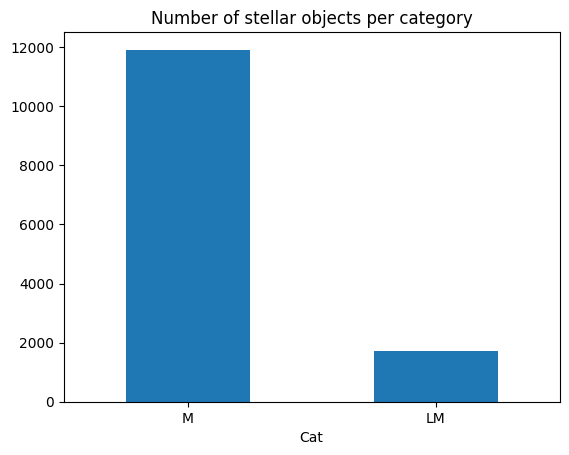

In [26]:
df_xp['Cat'].value_counts().plot(kind='bar', title='Number of stellar objects per category', rot=0)
df_xp['Cat'].value_counts()

<Axes: title={'center': 'Number of stellar objects per category'}, xlabel='Cat'>

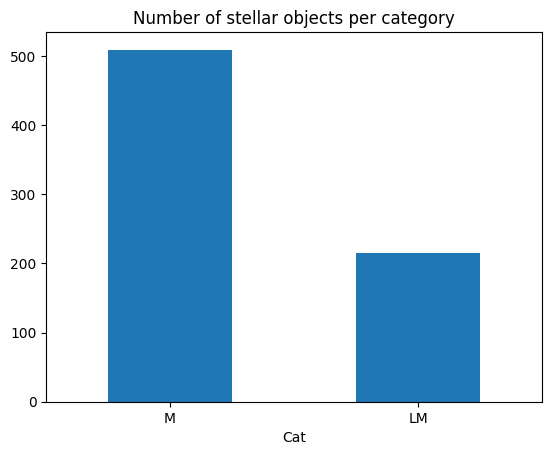

In [27]:
df_rvs['Cat'].value_counts().plot(kind='bar', title='Number of stellar objects per category', rot=0)

# Augment

Augment with low mass stars

In [29]:
xp_aug = parse_single_table('./queries/LM xp sampled-result.vot').to_table().to_pandas()
xp_aug['Cat'] = 'LM'

Cat
M     11909
LM    11727
Name: count, dtype: int64

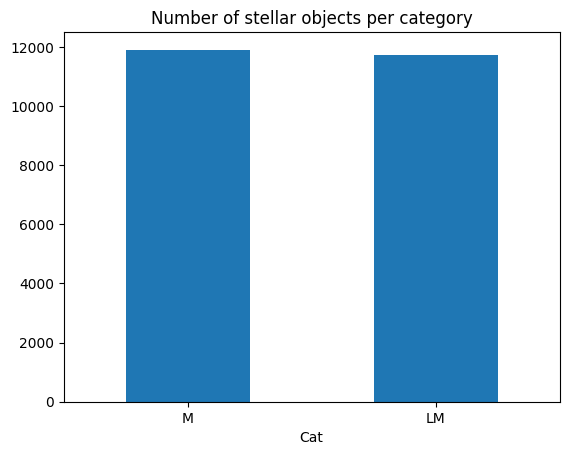

In [53]:
df_xp = pd.concat([df_xp, xp_aug]).drop_duplicates(keep=False)
df_xp.reset_index(drop=True, inplace=True)
df_xp['Cat'].value_counts().plot(kind='bar', title='Number of stellar objects per category', rot=0)
df_xp['Cat'].value_counts()

In [54]:
df_xp.to_parquet('./combined/df_xp.parquet', index=False)

In [34]:
rvs_aug = parse_single_table('./queries//LM rvs-result.vot').to_table().to_pandas()
rvs_aug['Cat'] = 'LM'
rvs_aug

,source_id,teff_gspphot,logg_gspphot,mh_gspphot,spectraltype_esphs,Cat
0,2263114441170949504,4865.234375,4.5684,-0.0214,K,LM
1,2263127158571260160,5982.272461,4.3054,-0.1024,F,LM
2,5912389792852926336,4324.676758,1.6897,-0.0400,K,LM
3,2263149247585066752,4633.369141,2.5195,0.1495,K,LM
4,2263155982093821312,5735.403809,4.3570,-0.1401,G,LM
...,...,...,...,...,...,...
195,5912966860354001152,5543.565430,4.2733,0.1274,G,LM
196,5912968067253956992,5330.711426,4.1237,0.0898,G,LM
197,2267489299154737280,4587.809082,2.6100,-0.2010,K,LM
198,5912461604707886976,4651.277832,2.3221,-0.2589,K,LM


<Axes: title={'center': 'Number of stellar objects per category'}, xlabel='Cat'>

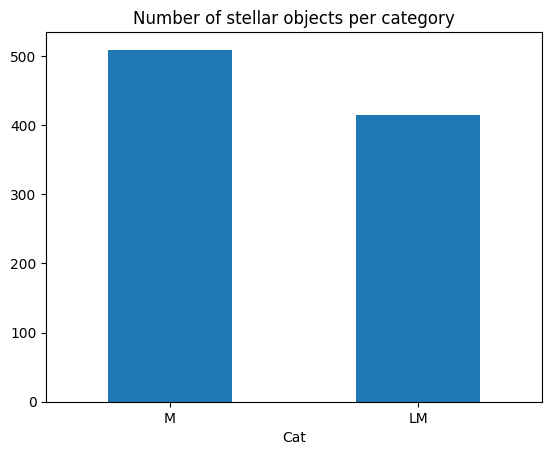

In [35]:
df_rvs = pd.concat([df_rvs, rvs_aug]).drop_duplicates(keep=False)
df_rvs.reset_index(drop=True, inplace=True)
df_rvs['Cat'].value_counts().plot(kind='bar', title='Number of stellar objects per category', rot=0)

In [36]:
df_rvs.to_parquet('./combined/df_rvs.parquet', index=False)

# Display

In [ ]:
for file in glob.glob(xp_dir + '/*.vot')[:2]:
    xp_df = parse_single_table(file).to_table().to_pandas()
    plt.errorbar(xp_df['wavelength'], xp_df['flux'], yerr=xp_df['flux_error'], fmt='-', markersize=2, figure=plt.figure(figsize=(15, 5)))
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    plt.title('Flux vs Wavelength')
    plt.show()

In [ ]:
for file in glob.glob(rvs_dir + '/*.vot')[:2]:
    rvs_df = parse_single_table(file).to_table().to_pandas()
    plt.errorbar(rvs_df['wavelength'], rvs_df['flux'], yerr=rvs_df['flux_error'], fmt='o', markersize=2, figure=plt.figure(figsize=(15, 5)))
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    plt.title('Flux vs Wavelength')
    plt.show()